In [20]:
#1 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import mode
from sklearn.datasets import fetch_openml
from scipy.io import arff


data, meta = arff.loadarff('column_diagnosis.arff')

df = pd.DataFrame(data)

features = df.drop('class', axis=1)
labels = df['class']

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Define values of k
k_values = [2, 3, 4, 5]

# Perform k-means clustering for different values of k
for k in k_values:
    # Initialize k-means object with explicit n_init parameter
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    
    # Fit the k-means model to the normalized data
    cluster_labels = kmeans.fit_predict(normalized_features)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(normalized_features, cluster_labels)
    
    # Calculate purity
    contingency = contingency_matrix(labels, cluster_labels)
    purity = np.sum(np.max(contingency, axis=0)) / np.sum(contingency)
    
    # Output results
    print(f'Number of clusters: {k}')
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Purity: {purity}\n')


Number of clusters: 2
Silhouette Score: 0.3604412434044111
Purity: 0.632258064516129

Number of clusters: 3
Silhouette Score: 0.2957905573000225
Purity: 0.667741935483871

Number of clusters: 4
Silhouette Score: 0.27442402122340176
Purity: 0.6612903225806451

Number of clusters: 5
Silhouette Score: 0.23823928397844843
Purity: 0.6774193548387096



In [22]:
#2
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


data, meta = arff.loadarff('column_diagnosis.arff')


features = meta.names()[:-1]  


data_array = np.array(data[features].tolist())

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data
normalized_data = scaler.fit_transform(data_array)

# Initialize PCA with 2 components
pca = PCA(n_components=2)

pca_result = pca.fit_transform(normalized_data)

explained_variance_ratio = pca.explained_variance_ratio_

print("Variance explained by the top two components: {:.2f}%".format(sum(explained_variance_ratio) * 100))

weights = np.abs(pca.components_.T)

# Sort input variables by relevance for the first principal component
sorted_variables_pc1 = sorted(list(zip(features, weights[:, 0])), key=lambda x: abs(x[1]), reverse=True)

# Sort input variables by relevance for the second principal component
sorted_variables_pc2 = sorted(list(zip(features, weights[:, 1])), key=lambda x: abs(x[1]), reverse=True)

# Print the sorted variables for the first principal component
print("Sorted variables for the first principal component:")
for variable, weight in sorted_variables_pc1:
    print("{}: {:.4f}".format(variable, weight))

# Print the sorted variables for the second component
print("\nSorted variables for the second principal component:")
for variable, weight in sorted_variables_pc2:
    print("{}: {:.4f}".format(variable, weight))


Variance explained by the top two components: 77.14%
Sorted variables for the first principal component:
pelvic_incidence: 0.5916
lumbar_lordosis_angle: 0.5151
pelvic_tilt: 0.4670
sacral_slope: 0.3257
degree_spondylolisthesis: 0.2169
pelvic_radius: 0.1158

Sorted variables for the second principal component:
pelvic_tilt: 0.6704
pelvic_radius: 0.5811
sacral_slope: 0.4433
pelvic_incidence: 0.1000
lumbar_lordosis_angle: 0.0800
degree_spondylolisthesis: 0.0046


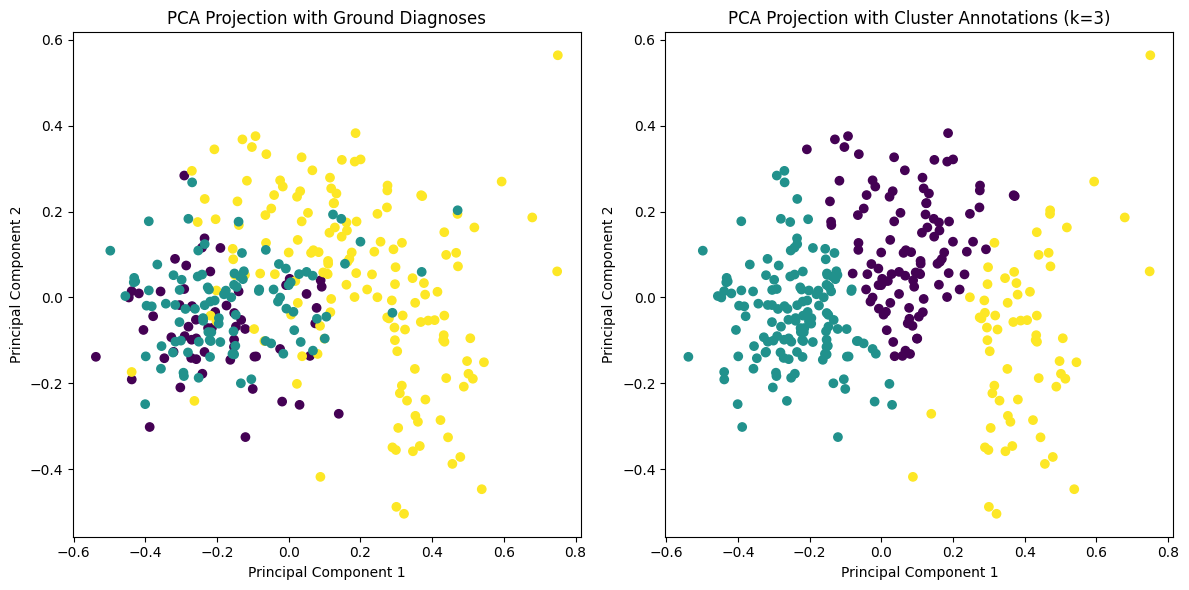

In [19]:
#3

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.io import arff
from io import StringIO


data, meta = arff.loadarff('column_diagnosis.arff')
data = pd.DataFrame(data)


features = data.drop(columns=['class'])


scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(features)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  
cluster_labels = kmeans.fit_predict(normalized_data)

# Plot the PCA projection with ground diagnoses and cluster annotations
plt.figure(figsize=(12, 6))

# Plot for ground diagnoses
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['class'].astype('category').cat.codes, cmap='viridis')
plt.title('PCA Projection with Ground Diagnoses')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot for k=3 clustering solution
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA Projection with Cluster Annotations (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


4. 
Algoritmos de agrupamento, conforme mostrado na pergunta 1, podem ser usados ​​para identificar subgrupos distintos dentro da população. Por exemplo agrupar com k=2 produziu o maior Silhouette Score, indicando clusters bem definidos. Esses clusters podem representar diferentes estados de saúde, como “Doente” e “Saudável”. Ao examinar as atribuições e características dos clusters, os profissionais de saúde podem obter insights sobre as características que diferenciam estes subgrupos. Esta informação pode ser valiosa para adaptar tratamentos, intervenções ou estratégias de monitorização específicas para cada subgrupo.
O clustering pode ser utilizado como uma forma de deteção de anomalias. Quando os dados de um novo indivíduo são adicionados ao conjunto de dados, os algoritmos de clustering podem atribuir o indivíduo a um dos clusters existentes. Se o indivíduo for significativamente diferente dos padrões típicos dentro do grupo atribuído, isso pode indicar um potencial problema de saúde. Este método pode ser particularmente útil para o diagnóstico precoce. Ao monitorizar continuamente novos dados e agrupar indivíduos, os prestadores de cuidados de saúde podem identificar desvios da norma, permitindo potencialmente uma intervenção precoce e medidas proactivas de cuidados de saúde tanto para indivíduos doentes como saudáveis.